# Bigraph-Builder Demo

In [1]:
# imports
from builder import Builder, Process, ProcessTypes

## Initialize the builder

In [2]:
core = ProcessTypes()
b = Builder(core=core)

### register new types

In [3]:
b.register_type(
    'default 1', {
        '_inherit': 'float',
        '_default': 1.0})

## Register some processes

### list built-in processes

In [4]:
b.list_processes()

['console-emitter', 'ram-emitter']

### register by passing in process class

In [5]:
from process_bigraph.experiments.minimal_gillespie import GillespieEvent
b.register_process('GillespieEvent', GillespieEvent)

### register by address

In [6]:
b.register_process(
    'GillespieInterval',
    address='process_bigraph.experiments.minimal_gillespie.GillespieInterval',  # currently only supports local addresses
)

### register with decorator

In [7]:
@b.register_process('toy')
class Toy(Process):
    config_schema = {
        'A': 'float',
        'B': 'float',
    }

    def __init__(self, config, core):
        super().__init__(config, core)

    def schema(self):
        return {
            'inputs': {
                'A': 'float',
                'B': 'float'},
            'outputs': {
                'C': 'float'}
        }

    def update(self, state, interval):
        update = {
            'C': state['A'] + state['B']
        }
        return update


### list registered processes

In [8]:
b.list_processes()

['console-emitter',
 'toy',
 'GillespieInterval',
 'ram-emitter',
 'GillespieEvent']

## Add processes to the bigraph

In [9]:
## add processes
b['event_process'].add_process(
    name='GillespieEvent',
    kdeg=1.0,  # kwargs fill parameters in the config
)

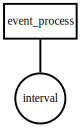

In [10]:
b.visualize()

### print ports

In [11]:
b['event_process'].interface(True)

AttributeError: 'BuilderNode' object has no attribute 'interface'

### connect ports

In [ ]:
b['event_process'].connect(port='mRNA', target=['mRNA_store'])
b['event_process'].connect(port='DNA', target=['DNA_store'])
b

In [ ]:
b.visualize()

In [ ]:
b['interval_process'].add_process(
    name='GillespieInterval',
    # inputs={'port_id': ['store']}  # we should be able to set the wires directly like this
)

In [ ]:
b.visualize()

In [ ]:
b.connect_all()

In [ ]:
b.builder_tree

In [ ]:
b.compile()

In [ ]:
doc = b.document()
doc

In [ ]:
b.write(filename='toy_bigraph')